### Import Data from CSV

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from IPython.display import display
from src import data_processing as dp
from src import sanky_chart as sc
from src import match_length as ml
from src import serving_analysis as sa
from src import mental_toughness as mt
from src import rising_star as rs

### Data Cleaning

In [2]:
all_data = dp.read_gslam_files("data/atp_matches*.csv")
all_data.head()

,tourney_name,surface,tourney_level,winner_name,loser_name,score,best_of,round,minutes,w_ace,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Roland Garros,Clay,G,Lleyton Hewitt,Brian Vahaly,6-4 6-1 6-7(6) 6-3,5,R128,193.0,2.0,...,3.0,7.0,1.0,6.0,164.0,105.0,53.0,29.0,10.0,20.0
1,Roland Garros,Clay,G,Nikolay Davydenko,Greg Rusedski,6-3 7-5 6-2,5,R128,116.0,1.0,...,4.0,5.0,5.0,3.0,86.0,48.0,31.0,17.0,7.0,12.0
2,Roland Garros,Clay,G,Jonas Bjorkman,Max Mirnyi,6-1 6-2 6-4,5,R128,102.0,2.0,...,1.0,1.0,15.0,4.0,81.0,44.0,34.0,9.0,4.0,9.0
3,Roland Garros,Clay,G,Tommy Robredo,Giovanni Lapentti,3-6 7-6(3) 3-6 3-1 RET,5,R128,163.0,5.0,...,10.0,16.0,3.0,8.0,128.0,74.0,48.0,27.0,9.0,14.0
4,Roland Garros,Clay,G,Gaston Gaudio,Paul Henri Mathieu,7-5 6-3 6-3,5,R128,131.0,6.0,...,4.0,5.0,1.0,2.0,92.0,43.0,34.0,21.0,4.0,9.0


##### Organize other player data

Remove the big three from the data, and set the data frame to `data_other`.

In [3]:
data_other = dp.remove_player(["Roger Federer", "Rafael Nadal", "Novak Djokovic"], all_data, 'winner')
sum_other = data_other.sum()
data_other.head()

,tourney_name,surface,tourney_level,winner_name,loser_name,score,best_of,round,minutes,w_ace,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Roland Garros,Clay,G,Lleyton Hewitt,Brian Vahaly,6-4 6-1 6-7(6) 6-3,5,R128,193.0,2.0,...,3.0,7.0,1.0,6.0,164.0,105.0,53.0,29.0,10.0,20.0
1,Roland Garros,Clay,G,Nikolay Davydenko,Greg Rusedski,6-3 7-5 6-2,5,R128,116.0,1.0,...,4.0,5.0,5.0,3.0,86.0,48.0,31.0,17.0,7.0,12.0
2,Roland Garros,Clay,G,Jonas Bjorkman,Max Mirnyi,6-1 6-2 6-4,5,R128,102.0,2.0,...,1.0,1.0,15.0,4.0,81.0,44.0,34.0,9.0,4.0,9.0
3,Roland Garros,Clay,G,Tommy Robredo,Giovanni Lapentti,3-6 7-6(3) 3-6 3-1 RET,5,R128,163.0,5.0,...,10.0,16.0,3.0,8.0,128.0,74.0,48.0,27.0,9.0,14.0
4,Roland Garros,Clay,G,Gaston Gaudio,Paul Henri Mathieu,7-5 6-3 6-3,5,R128,131.0,6.0,...,4.0,5.0,1.0,2.0,92.0,43.0,34.0,21.0,4.0,9.0


##### Organize Federer data

In [4]:
data_federer = all_data[all_data['winner_name'] == "Roger Federer"]
data_federer.drop([ 'winner_name' ], axis=1, inplace=True)
data_federer.head()

C:\Users\LCA\AppData\Local\Temp\ipykernel_49980\2681435950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_federer.drop([ 'winner_name' ], axis=1, inplace=True)


,tourney_name,surface,tourney_level,loser_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
143,Wimbledon,Grass,G,Hyung Taik Lee,6-3 6-3 7-6(2),5,R128,105.0,15.0,3.0,...,7.0,9.0,2.0,4.0,97.0,67.0,43.0,11.0,6.0,11.0
199,Wimbledon,Grass,G,Stefan Koubek,7-5 6-1 6-1,5,R64,77.0,6.0,3.0,...,2.0,3.0,0.0,3.0,75.0,45.0,20.0,15.0,5.0,12.0
227,Wimbledon,Grass,G,Mardy Fish,6-3 6-1 4-6 6-1,5,R32,120.0,13.0,4.0,...,5.0,6.0,9.0,6.0,102.0,56.0,38.0,19.0,6.0,12.0
241,Wimbledon,Grass,G,Feliciano Lopez,7-6(5) 6-4 6-4,5,R16,126.0,9.0,2.0,...,3.0,6.0,13.0,3.0,127.0,80.0,51.0,24.0,13.0,18.0
248,Wimbledon,Grass,G,Sjeng Schalken,6-3 6-4 6-4,5,QF,98.0,13.0,5.0,...,3.0,4.0,1.0,2.0,102.0,74.0,45.0,12.0,7.0,11.0


##### Organize Nadal Data

In [5]:
data_nadal = all_data[all_data['winner_name'] == "Rafael Nadal"]
data_nadal.drop([ 'winner_name' ], axis=1, inplace=True)
data_nadal.head()

C:\Users\LCA\AppData\Local\Temp\ipykernel_49980\1499888279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nadal.drop([ 'winner_name' ], axis=1, inplace=True)


,tourney_name,surface,tourney_level,loser_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
137,Wimbledon,Grass,G,Mario Ancic,6-3 6-4 4-6 6-4,5,R128,184.0,2.0,0.0,...,11.0,14.0,15.0,6.0,134.0,73.0,58.0,20.0,11.0,16.0
196,Wimbledon,Grass,G,Lee Childs,6-2 6-4 6-3,5,R64,121.0,3.0,2.0,...,2.0,4.0,9.0,5.0,89.0,52.0,36.0,14.0,13.0,19.0
307,US Open,Hard,G,Fernando Vicente,6-4 6-3 6-3,5,R128,133.0,2.0,4.0,...,3.0,3.0,9.0,8.0,111.0,65.0,44.0,19.0,14.0,18.0
824,US Open,Hard,G,Ivo Heuberger,6-0 6-3 4-6 2-6 6-3,5,R128,174.0,6.0,3.0,...,1.0,4.0,17.0,8.0,156.0,85.0,58.0,30.0,9.0,15.0
947,Australian Open,Hard,G,Michal Tabara,6-1 6-2 6-2,5,R128,77.0,5.0,3.0,...,2.0,2.0,4.0,5.0,61.0,29.0,18.0,12.0,4.0,10.0


##### Organize Djokovic data

In [6]:
data_djoker = all_data[all_data['winner_name'] == "Novak Djokovic"]
data_djoker.drop([ 'winner_name' ], axis=1, inplace=True)
data_djoker.head()

C:\Users\LCA\AppData\Local\Temp\ipykernel_49980\1261933983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_djoker.drop([ 'winner_name' ], axis=1, inplace=True)


,tourney_name,surface,tourney_level,loser_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
1049,Roland Garros,Clay,G,Robby Ginepri,6-0 6-0 6-3,5,R128,78.0,6.0,2.0,...,1.0,2.0,4.0,4.0,80.0,45.0,22.0,11.0,7.0,16.0
1196,Wimbledon,Grass,G,Juan Monaco,6-3 7-6(5) 6-3,5,R128,113.0,2.0,5.0,...,2.0,3.0,4.0,5.0,97.0,63.0,44.0,18.0,7.0,10.0
1233,Wimbledon,Grass,G,Guillermo Garcia Lopez,3-6 3-6 7-6(5) 7-6(3) 6-4,5,R64,248.0,8.0,4.0,...,9.0,18.0,6.0,5.0,182.0,108.0,76.0,33.0,10.0,17.0
1296,US Open,Hard,G,Gael Monfils,7-5 4-6 7-6(5) 0-6 7-5,5,R128,237.0,3.0,5.0,...,12.0,16.0,22.0,5.0,147.0,78.0,67.0,39.0,1.0,3.0
1347,US Open,Hard,G,Mario Ancic,6-3 5-7 7-6(4) 6-3,5,R64,207.0,6.0,4.0,...,3.0,7.0,8.0,3.0,133.0,88.0,64.0,20.0,8.0,13.0


##### Organize rising star data Alexander Zverev Dominic Thiem Nick Kyrgois

In [7]:
data_zverev = all_data[all_data['winner_name'] == "Alexander Zverev"]
data_zverev.drop([ 'winner_name' ], axis=1, inplace=True)
data_zverev.head()

C:\Users\LCA\AppData\Local\Temp\ipykernel_49980\1210318907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zverev.drop([ 'winner_name' ], axis=1, inplace=True)


,tourney_name,surface,tourney_level,loser_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
6752,Roland Garros,Clay,G,Pierre Hugues Herbert,5-7 6-2 7-6(6) 7-5,5,R128,188.0,8.0,6.0,...,5.0,7.0,7.0,5.0,148.0,76.0,57.0,35.0,8.0,12.0
6805,Roland Garros,Clay,G,Stephane Robert,6-1 3-6 6-1 6-4,5,R64,129.0,5.0,2.0,...,5.0,8.0,11.0,7.0,100.0,48.0,35.0,20.0,5.0,12.0
6894,Wimbledon,Grass,G,Paul Henri Mathieu,6-3 6-4 6-2,5,R128,96.0,20.0,2.0,...,5.0,7.0,3.0,8.0,86.0,48.0,26.0,19.0,3.0,9.0
6940,Wimbledon,Grass,G,Mikhail Youzhny,6-4 3-6 6-0 4-6 6-2,5,R64,198.0,10.0,10.0,...,7.0,11.0,3.0,2.0,137.0,90.0,55.0,22.0,4.0,12.0
7029,US Open,Hard,G,Daniel Brands,3-6 6-1 6-4 7-6(4),5,R128,155.0,4.0,7.0,...,2.0,4.0,7.0,9.0,126.0,70.0,49.0,27.0,8.0,12.0


In [8]:
data_thiem = all_data[all_data['winner_name'] == "Dominic Thiem"]
data_thiem.drop([ 'winner_name' ], axis=1, inplace=True)
data_thiem.head()

C:\Users\LCA\AppData\Local\Temp\ipykernel_49980\3128590229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thiem.drop([ 'winner_name' ], axis=1, inplace=True)


,tourney_name,surface,tourney_level,loser_name,score,best_of,round,minutes,w_ace,w_df,...,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
5625,Australian Open,Hard,G,Joao Sousa,5-7 6-4 6-3 7-6(3),5,R128,185.0,20.0,3.0,...,5.0,8.0,8.0,0.0,144.0,94.0,57.0,30.0,7.0,12.0
5716,Roland Garros,Clay,G,Paul Henri Mathieu,6-4 7-6(3) 6-2,5,R128,128.0,4.0,5.0,...,3.0,5.0,2.0,4.0,85.0,53.0,31.0,19.0,4.0,9.0
6007,US Open,Hard,G,Lukas Lacko,6-3 6-3 6-2,5,R128,86.0,6.0,1.0,...,3.0,3.0,2.0,3.0,78.0,43.0,30.0,15.0,7.0,12.0
6052,US Open,Hard,G,Ernests Gulbis,4-6 3-6 6-4 6-3 6-3,5,R64,225.0,5.0,7.0,...,4.0,7.0,20.0,10.0,157.0,86.0,65.0,35.0,13.0,18.0
6074,US Open,Hard,G,Feliciano Lopez,6-4 6-2 6-3,5,R32,109.0,6.0,6.0,...,6.0,8.0,5.0,1.0,80.0,48.0,28.0,16.0,6.0,12.0


### Sankey Data Creation by Considering Top 20 Tennis Players

In [9]:
#data taken for Sankey diagram is for top 20 players, so that the visualization is clear
tgs = len(all_data) #total grand slam matches played
sanky_data = all_data.groupby('winner_name',as_index=False).size().sort_values('size', ascending=False).head(20) #data for sanky diagram
sanky_data 

,winner_name,size
428,Roger Federer,324
377,Novak Djokovic,284
407,Rafael Nadal,279
50,Andy Murray,182
104,David Ferrer,143
495,Tomas Berdych,140
459,Stan Wawrinka,140
51,Andy Roddick,116
243,Jo-Wilfried Tsonga,115
317,Marin Cilic,115


##### Sankey data creation by considering top 20 tennis players

In [10]:
sanky_data['total_grand_slams'] = 'Grand slam matches from 2003 to 2020: ' + str(+ tgs)
sanky_data["winner_name"] = sanky_data["winner_name"] +": "+ (sanky_data['size']).astype(str)
sanky_data

,winner_name,size,total_grand_slams
428,Roger Federer: 324,324,Grand slam matches from 2003 to 2020: 8732
377,Novak Djokovic: 284,284,Grand slam matches from 2003 to 2020: 8732
407,Rafael Nadal: 279,279,Grand slam matches from 2003 to 2020: 8732
50,Andy Murray: 182,182,Grand slam matches from 2003 to 2020: 8732
104,David Ferrer: 143,143,Grand slam matches from 2003 to 2020: 8732
495,Tomas Berdych: 140,140,Grand slam matches from 2003 to 2020: 8732
459,Stan Wawrinka: 140,140,Grand slam matches from 2003 to 2020: 8732
51,Andy Roddick: 116,116,Grand slam matches from 2003 to 2020: 8732
243,Jo-Wilfried Tsonga: 115,115,Grand slam matches from 2003 to 2020: 8732
317,Marin Cilic: 115,115,Grand slam matches from 2003 to 2020: 8732


### 

In [11]:
data, layout = sc.sanky_chart_data(sanky_data)
fig = go.Figure(data=[data], layout=layout)
 
fig.show()

### Match Length Violin Plot

In [12]:
# Fetch winning and losing match length for Roger Federer
lose_federer, win_federer = ml.player_match_length("Roger Federer", data_other, data_federer)

# Fetch winning and losing match length for Rafael Nadal
lose_nadal, win_nadal = ml.player_match_length("Rafael Nadal", data_other, data_nadal)

# Fetch winning and losing match length for Novak Djokovic
lose_djoker, win_djoker = ml.player_match_length("Novak Djokovic", data_other, data_djoker)

# Fetch winning and losing match length for other players
win_other = data_other[data_other['minutes'] <= 400]
win_other.insert(0, column = "Result", value = ['Win']*len(win_other))
win_other.insert(0, column = "Name", value = ["Other"]*len(win_other))
lose_other = dp.remove_player(["Roger Federer", "Rafael Nadal", "Novak Djokovic"], all_data, 'loser')
lose_other = lose_other[lose_other['minutes'] <= 400]
lose_other.insert(0, column = "Result", value = ['Lose']*len(lose_other))
lose_other.insert(0, column = "Name", value = ["Other"]*len(lose_other))

violin_data = pd.concat([win_federer, lose_federer, win_nadal, lose_nadal, win_djoker, lose_djoker, win_other, lose_other])
violin_data = violin_data.rename(columns={"minutes": "Minutes"}, errors="raise")

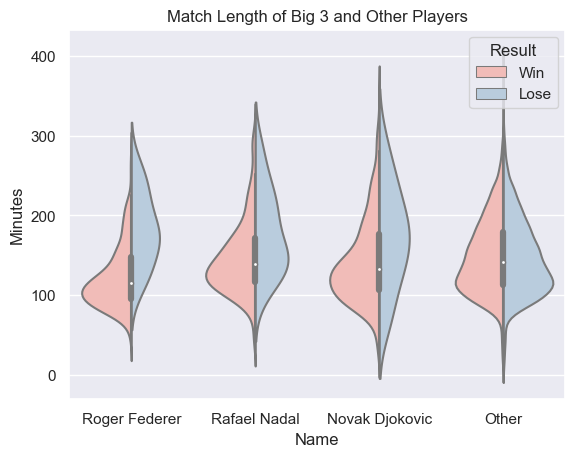

In [13]:
sns.set(style="darkgrid")
sns.violinplot(x="Name", y="Minutes", hue="Result", data=violin_data, palette="Pastel1", split=True).set(title='Match Length of Big 3 and Other Players')
plt.show()

### Serving Analysis

In [14]:
data_federer, sum_federer = sa.player_data("Roger Federer", all_data)
data_nadal, sum_nadal = sa.player_data("Rafael Nadal", all_data)
data_djoker, sum_djoker = sa.player_data("Novak Djokovic", all_data)

#rising star match length t Alexander Zverev Dominic Thiem 
data_zverev, sum_zverev = sa.player_data("Alexander Zverev", all_data)
data_thiem, sum_thiem = sa.player_data("Dominic Thiem", all_data)

# Counting number of ace point played by every winning player
ace_winner = sa.player_group_data(all_data, 'w_ace')
# Counting number of firstserve played by every winning player
firstserve_winner = sa.player_group_data(all_data, 'w_1stWon')
# Counting number of secondserve played by every winning player
secondserve_winner = sa.player_group_data(all_data, 'w_2ndWon')
# Counting number of double faults by every player
df_winner = all_data[['winner_name', 'w_df']].groupby('winner_name').sum()
df_winner = pd.DataFrame(df_winner)
df_winner.head()

,w_df
winner_name,
Adam Pavlasek,10.0
Adrian Mannarino,95.0
Adrian Menendez Maceiras,1.0
Adrian Ungur,6.0
Adrian Voinea,3.0


##### Percentage barplot

74.35768623510836 76.99489387264717


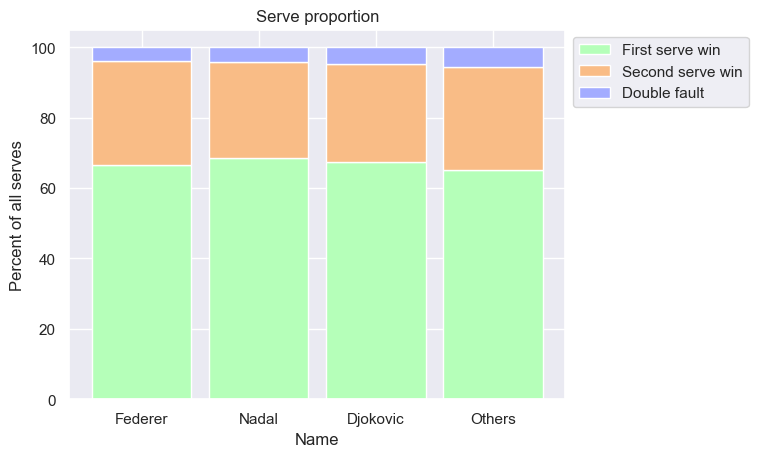

In [15]:
# Data
r = [0,1,2,3]
ff, fs, fd = sa.serving_data(sum_federer)
nf, ns, nd = sa.serving_data(sum_nadal)
df, ds, dd = sa.serving_data(sum_djoker) 
of, os, od = sa.serving_data(sum_other) 
tf, ts, td = sa.serving_data(sum_thiem) 
zf, zs, zd = sa.serving_data(sum_zverev) 

score_Federer_serving = sa.score_serving(ff,fs,fd)
score_Nadal_serving = sa.score_serving(nf,ns,nd)
score_Djoker_serving = sa.score_serving(df,ds,dd)
score_Other_serving = sa.score_serving(of,os,od)
score_Zverev_serving = sa.score_serving(zf,zs,zd)
score_Thiem_serving = sa.score_serving(tf,ts,td)
print(score_Zverev_serving, score_Thiem_serving)

raw_data = {'greenBars': [ff, nf, df, of], 'orangeBars': [fs, ns, ds,os], 'blueBars': [fd, nd, dd, od]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
# plot
barWidth = 0.85
names = ('Federer','Nadal','Djokovic','Others')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="First serve win")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Second serve win")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Double fault")

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Name")
plt.ylabel("Percent of all serves")
plt.title("Serve proportion")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

##### Scatter plot

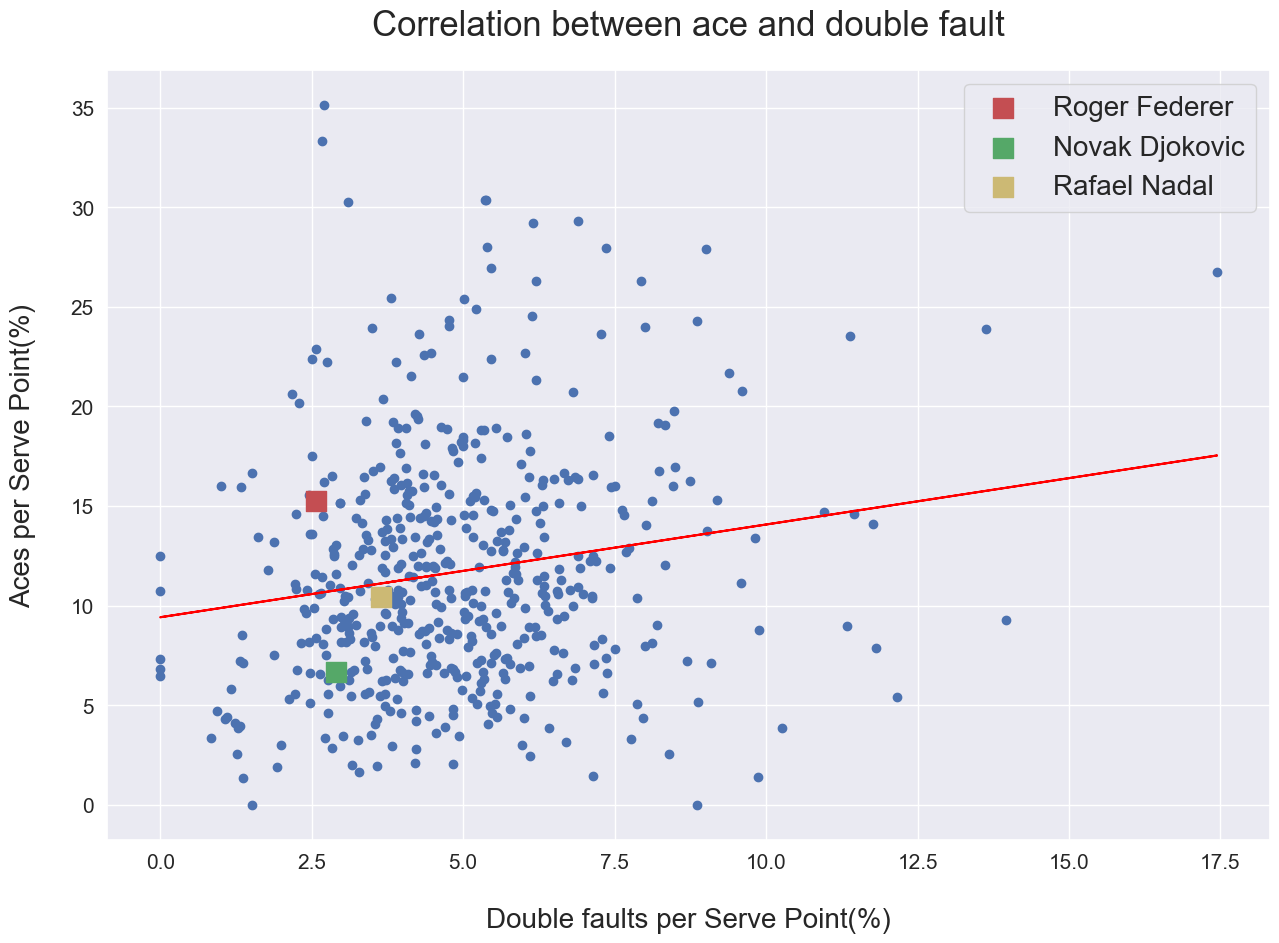

In [16]:
fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between ace and double fault',fontsize=25, pad=25.0)
axis.set_xlabel('Double faults per Serve Point(%)',fontsize=20, labelpad= 25.0)
axis.set_ylabel('Aces per Serve Point(%)',fontsize=20, labelpad=25.0)

ace_data = (ace_winner['w_ace']).values.reshape(-1, 1)
df_data = (df_winner['w_df']).values.reshape(-1, 1)
firstserve_win = firstserve_winner['w_1stWon'].values.reshape(-1, 1)
secondserve_win = secondserve_winner['w_2ndWon'].values.reshape(-1, 1)
X = df_data/(firstserve_win+secondserve_win+df_data)*100
Y = ace_data/(firstserve_win+secondserve_win+df_data)*100

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor_one.predict(X)  # make predictions


plt.plot(X, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

axis.scatter(X, Y)
plt.scatter (*sa.serve_percentage(sum_federer), s=200, marker = 's', color='r', label = 'Roger Federer')
plt.scatter (*sa.serve_percentage(sum_nadal), s=200, marker = 's', color='g', label = 'Novak Djokovic')
plt.scatter (*sa.serve_percentage(sum_djoker), s=200, marker = 's', color='y', label = 'Rafael Nadal')
plt.legend(prop={'size': 20})

### Mental Toughness

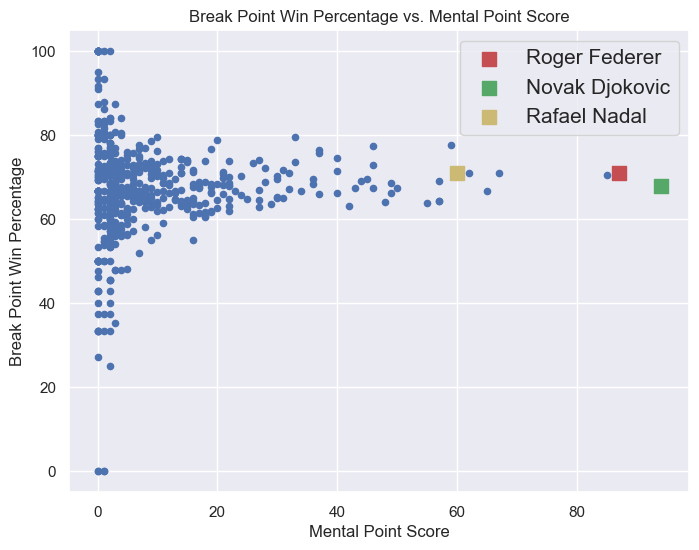

In [17]:
# Group the data by winner name and add all the break points
mental_df = all_data[['winner_name', 'w_bpSaved', 'w_bpFaced']].groupby('winner_name').sum()

# Add a percentage collumn with the breakpoint percentage
mental_df['percentage'] = mental_df.apply(lambda x: mt.get_percentage(x['w_bpSaved'], x['w_bpFaced']), axis=1)

# Add a mental points collumn with the mental point scores
mt.add_mental_points_col(mental_df, list(mental_df.index), all_data)

# Plot the scatterplot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(mental_df['mental_score'], mental_df['percentage'], s=20)
ax.set_title("Break Point Win Percentage vs. Mental Point Score")
ax.set_xlabel('Mental Point Score')
ax.set_ylabel('Break Point Win Percentage')
mt.annotate_plot(ax, mental_df, ["Roger Federer", "Novak Djokovic", "Rafael Nadal"], ["r", "g", "y"])

# plt.scatter (2.57,15.253, s=200, marker = 's', color='r', label = 'Federer')
# plt.scatter (2.94, 6.6634, s=200, marker = 's', color='g', label = 'Nadal')
# plt.scatter (3.6525, 10.563, s=200, marker = 's', color='y', label = 'Djokovic')
plt.legend(prop={'size': 15})

plt.show()

mental_df = mental_df.sort_values('mental_score',ascending=False)

In [18]:
pd.set_option('display.max_rows',525)
mental_df.head(30)

,w_bpSaved,w_bpFaced,percentage,mental_score
winner_name,,,,
Novak Djokovic,1046.0,1538.0,68.01,94
Roger Federer,972.0,1366.0,71.16,87
Stan Wawrinka,653.0,927.0,70.44,85
Marin Cilic,478.0,674.0,70.92,67
Andy Murray,746.0,1118.0,66.73,65
Feliciano Lopez,367.0,517.0,70.99,62
Rafael Nadal,1026.0,1444.0,71.05,60
John Isner,220.0,283.0,77.74,59
Gael Monfils,459.0,714.0,64.29,57


### Rising Star

##### Data process with match length

In [19]:
# Calculate the difference of losing and winning match length for different players
dif_Federer = rs.match_len_diff(lose_federer, win_federer)
dif_Nadal = rs.match_len_diff(lose_nadal, win_nadal)
dif_Djoker = rs.match_len_diff(lose_djoker, win_djoker)
dif_Other = rs.match_len_diff(lose_other, win_other)

print(dif_Federer,dif_Nadal,dif_Djoker,dif_Other)
group_win = all_data.groupby(['winner_name'])
group_lose = all_data.groupby(['loser_name'])
dif = []
for name in group_win.groups.keys():
    player_win = group_win.get_group(name)
    win_length = player_win['minutes'].mean()
    player_lose = group_lose.get_group(name)
    lose_length = player_lose['minutes'].mean()
    dif.append(lose_length - win_length)

dif.sort(reverse = True)
dif_Largest = max(dif)
dif_Least = min(dif)

# Calculate the scores of match length for different players
score_Federer_length = rs.match_length_score(dif_Federer, dif_Least, dif_Largest)
score_Nadal_length = rs.match_length_score(dif_Nadal, dif_Least, dif_Largest)
score_Djoker_length = rs.match_length_score(dif_Djoker, dif_Least, dif_Largest)
score_Other_length = rs.match_length_score(dif_Other, dif_Least, dif_Largest)

59.29629629629629 30.856630824372758 29.57163671685285 -1.7450049915708803


##### Data process with Mental toughness

In [20]:
score_Federer_mental = mental_df.loc['Roger Federer','mental_score']
score_Djoker_mental = mental_df.loc['Novak Djokovic','mental_score']
score_Nadal_mental = mental_df.loc['Rafael Nadal','mental_score']
score_Zverev_mental = mental_df.loc['Alexander Zverev','mental_score']
score_Thiem_mental = mental_df.loc['Dominic Thiem','mental_score']
mental_df_other = mental_df.drop(['Roger Federer','Novak Djokovic','Rafael Nadal'])
score_Other_mental = mental_df_other['mental_score'].mean()

##### Radar charts

In [21]:
categories = ['Serving Skills','Match Length','Mental Toughness','Serving Skills']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[score_Other_serving, score_Other_length,score_Other_mental,score_Other_serving],
      theta=categories,
      fill=None,
      name='Other player average'
))

fig.update_layout(

        title=dict(
        text="Other player average",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

fig.show()

In [22]:
categories = ['Serving Skills','Match Length','Mental Toughness','Serving Skills']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[score_Federer_serving, score_Federer_length,score_Federer_mental,score_Federer_serving],
      theta=categories,
      fill=None,
      name='Federer'
))

fig.add_trace(go.Scatterpolar(
      r=[score_Djoker_serving, score_Djoker_length,score_Djoker_mental,score_Djoker_serving],
      theta=categories,
      fill=None,
      name='Djokovic'
))
fig.add_trace(go.Scatterpolar(
      r=[score_Nadal_serving, score_Nadal_length,score_Nadal_mental,score_Nadal_serving],
      theta=categories,
      fill=None,
      name='Nadal'
))
fig.update_layout(
            title=dict(
        text="Big 3",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[50, 100]
    )),
  showlegend=True
)

fig.show()

In [23]:
average_Big3_serving = (score_Federer_serving + score_Nadal_serving + score_Djoker_serving)/3
average_Big3_length = (score_Federer_length + score_Nadal_length + score_Djoker_length)/3
average_Big3_mental = (score_Federer_mental + score_Nadal_mental + score_Djoker_mental)/3

In [24]:
categories = ['Serving Skills','Match Length','Mental Toughness','Serving Skills']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[average_Big3_serving, average_Big3_length,average_Big3_mental,average_Big3_serving],
      theta=categories,
      fill=None,
      name='Big 3 average'
))

fig.add_trace(go.Scatterpolar(
      r=[score_Other_serving, score_Other_length,score_Other_mental,score_Other_serving],
      theta=categories,
      fill=None,
      name='Other player average'
))
fig.update_layout(
        title=dict(
        text="Big 3 average VS Other player average",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),
    
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

fig.show()

In [25]:
#rising start Alexander Zverev Dominic Thiem

In [26]:
#rising star match length  Alexander Zverev Dominic Thiem 
lose_zverev, win_zverev = ml.player_match_length("Alexander Zverev", data_other, data_zverev)
lose_thiem, win_thiem = ml.player_match_length("Dominic Thiem", data_other, data_thiem)

dif_Zverev = rs.match_len_diff(lose_zverev, win_zverev)
dif_Thiem = rs.match_len_diff(lose_thiem, win_thiem)

score_Zverev_length = rs.match_length_score(dif_Zverev, dif_Least, dif_Largest)
score_Thiem_length = rs.match_length_score(dif_Thiem, dif_Least, dif_Largest)

print(score_Zverev_length, score_Thiem_length)

70.6643932935493 67.38765071245889


In [27]:
categories = ['Serving Skills','Match Length','Mental Toughness','Serving Skills']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[average_Big3_serving, average_Big3_length,average_Big3_mental,average_Big3_serving],
      theta=categories,
      fill=None,
      name='Big 3 average'
))

fig.add_trace(go.Scatterpolar(
      r=[score_Zverev_serving, score_Zverev_length,score_Zverev_mental,score_Zverev_serving],
      theta=categories,
      fill=None,
      name='Zverev'
))
fig.add_trace(go.Scatterpolar(
      r=[score_Thiem_serving, score_Thiem_length,score_Thiem_mental,score_Thiem_serving],
      theta=categories,
      fill=None,
      name='Thiem'
))
fig.add_trace(go.Scatterpolar(
      r=[score_Other_serving, score_Other_length,score_Other_mental,score_Other_serving],
      theta=categories,
      fill=None,
      name='Other player average',
      marker={'color':'#FFA15A'}
))
fig.update_layout(
    title=dict(
        text="Big 3 average VS Rising Star VS Other player average",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),
    
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 85]
    )),
  showlegend=True
)

fig.show()

In [28]:
categories = ['Serving Skills','Match Length','Mental Toughness','Serving Skills']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[score_Federer_serving, score_Federer_length,score_Federer_mental,score_Federer_serving],
      theta=categories,
      fill=None,
      name='Federer'
))

fig.add_trace(go.Scatterpolar(
      r=[score_Djoker_serving, score_Djoker_length,score_Djoker_mental,score_Djoker_serving],
      theta=categories,
      fill=None,
      name='Djokovic'
      
))
fig.add_trace(go.Scatterpolar(
      r=[score_Nadal_serving, score_Nadal_length,score_Nadal_mental,score_Nadal_serving],
      theta=categories,
      fill=None,
      name='Nadal'
))

fig.add_trace(go.Scatterpolar(
      r=[score_Zverev_serving, score_Zverev_length,score_Zverev_mental,score_Zverev_serving],
      theta=categories,
      fill=None,
      name='Zverev',
      marker={'color':'#7F7F7F'}
))
fig.add_trace(go.Scatterpolar(
      r=[score_Thiem_serving, score_Thiem_length,score_Thiem_mental,score_Thiem_serving],
      theta=categories,
      fill=None,
      name='Thiem'
))

fig.update_layout(
        title=dict(
        text="Big 3 VS Rising Star",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),
  
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,100]
    )),
  showlegend=True
)

fig.show()

##### Ranking of rising stars

In [29]:
ranking_data = dp.read_ranking_files("data/atp_rankings*.csv")
ranking_data

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0
...,...,...,...,...
65789,20220912,896,126135,14.0
65790,20220912,897,208386,14.0
65791,20220912,898,210012,14.0
65792,20220912,899,122109,14.0


In [30]:
#100644 Alexander Zverev
#106233 Dominic Thiem
#103819 Federer
#104745 Nadal
#104925 Djokovic
ranking = ranking_data[(ranking_data['player'].isin([100644,106233,103819,104745,104925]))]
ranking = ranking.sort_values(by=['ranking_date'])
ranking['ranking_date'] = pd.to_datetime(ranking['ranking_date'], format='%Y%m%d')
ranking = ranking.replace(100644,'Zverev')
ranking = ranking.replace(106233,'Thiem')
ranking = ranking.replace(103819,'Federer')
ranking = ranking.replace(104745,'Nadal')
ranking = ranking.replace(104925,'Djokovic')
ranking

,ranking_date,rank,player,points
0,2010-01-04,1,Federer,10550.0
1,2010-01-04,2,Nadal,9205.0
2,2010-01-04,3,Djokovic,8310.0
1812,2010-01-11,1,Federer,10550.0
1813,2010-01-11,2,Nadal,9310.0
...,...,...,...,...
63156,2022-08-29,211,Thiem,241.0
63852,2022-09-12,7,Djokovic,3570.0
63848,2022-09-12,3,Nadal,5810.0
63850,2022-09-12,5,Zverev,5040.0


In [31]:
fig = px.line(ranking, x="ranking_date", y="rank", color="player")
 
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title=dict(
        text="Big 3 VS Rising Star Ranking",
        y=0.95,
        x=0.5,
        xanchor= 'center',
        yanchor= 'top',
        font=dict(size=20)
    ),

)
fig.show()